In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Subset
from torch.utils.data import TensorDataset
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset,DataLoader,random_split

from torch import nn
import torch.nn.functional as F


import matplotlib.pyplot as plt
from tqdm import tqdm

## Load data

In [2]:
df_top5=pd.read_csv("top5.csv")
df_top10=pd.read_csv("top10.csv")
df_top100=pd.read_csv("top100.csv")

In [29]:
df_top10.sample(5)

,Unnamed: 0,consid,lsquotelephon,unmatch,swintus,tokugawa,theyv,seamless,neighbear,obvious,...,tuareg,dicewithoutdic,ldquonordquo,resourcepoor,theft,parenthet,rogu,grunspan,piersmdashth,Description
1591,305462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,for hundreds of years the city of atlantis was...
376,215841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,for those shipwrecked on the beach of this for...
1423,320698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,welcome sports fans blitz bowl ndash season 2 ...
838,175095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,the postcards in every local drug store read w...
1631,170624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,move your knights erect buildings and go crusa...


In [14]:
df_top5.head()

,Unnamed: 0,swintus,persuas,unmatch,tokugawa,suburbia,seamless,plastic,state,360,...,supermarket,taboo,export,pepper,concordia,maus,rogu,natur,orbit,Description
0,148494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,the animals on the farm are playing a game of ...
1,316377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7 wonders the board game with more awards than...
2,155987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,the abyss power is once again vacant so the ti...
3,21569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adigma is a party game which involves simultan...
4,31260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,description from boardgamenews in agricola you...


In [5]:
df_top100.head()

,Unnamed: 0,player,game,card,one,play,point,new,take,use,...,combin,even,possibl,help,expans,money,locat,around,give,Description
0,148494,3,1,0,1,1,1,0,2,0,...,0,0,0,0,0,0,0,0,1,the animals on the farm are playing a game of ...
1,316377,4,9,8,1,3,2,1,0,1,...,0,0,0,0,0,0,0,0,0,7 wonders the board game with more awards than...
2,155987,4,2,3,1,0,0,0,2,3,...,1,0,0,0,0,0,2,0,0,the abyss power is once again vacant so the ti...
3,21569,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,adigma is a party game which involves simultan...
4,31260,4,5,7,3,2,0,1,2,3,...,0,0,1,0,0,0,0,0,0,description from boardgamenews in agricola you...


In [6]:
len(df_top10)

2143

In [3]:
df= pd.DataFrame()

In [4]:
for column in df_top100.columns[:-1]:
    df[column]= df_top100[column].astype('float32')

/tmp/ipykernel_5389/1318679100.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column]= df_top100[column].astype('float32')


### To tensor

In [38]:
target = torch.tensor(df.iloc[:,0].values)
features = torch.tensor(df.iloc[:,1:].values)
train = TensorDataset(features, target)

In [39]:
type(train)

torch.utils.data.dataset.TensorDataset

### Split data and dataloader

In [40]:
m=len(train)

In [41]:
train_data, test_data = random_split(train, [int(m-m*0.2), int(m*0.2)+1])

In [50]:
batch_size=32

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,shuffle=True)

In [51]:
train_features, train_labels = next(iter(train_loader))
print(train_features)
print(len(train_features))
print(train_features.shape)
print(train_labels)
print(train_features.dtype)

tensor([[ 3.,  5.,  3.,  ...,  0.,  0.,  0.],
        [ 0.,  2.,  0.,  ...,  0.,  0.,  0.],
        [ 8.,  5.,  2.,  ...,  0.,  0.,  0.],
        ...,
        [ 2.,  1.,  0.,  ...,  0.,  0.,  0.],
        [ 3.,  1.,  1.,  ...,  0.,  0.,  0.],
        [10.,  4.,  4.,  ...,  0.,  0.,  0.]])
32
torch.Size([32, 100])
tensor([2.4669e+05, 3.0546e+05, 1.7516e+05, 1.6413e+05, 2.4492e+05, 1.2141e+05,
        2.0430e+05, 2.6530e+03, 1.4519e+05, 2.7689e+05, 8.7890e+04, 1.7591e+05,
        1.8356e+05, 1.5951e+05, 2.3947e+05, 4.1239e+04, 1.5409e+05, 5.7820e+03,
        3.2165e+04, 1.0928e+05, 1.8000e+01, 3.4775e+05, 9.7842e+04, 1.3810e+03,
        2.0532e+05, 1.2474e+05, 1.9528e+05, 4.6300e+02, 3.3896e+05, 1.8077e+05,
        1.8152e+05, 1.7502e+05])
torch.float32


## Create Autoencoder

### NN class

In [52]:
class Encoder(nn.Module):
    
    def __init__(self, encoded_space_dim,fc2_input_dim):
        super().__init__()
        
        
        ### Flatten layer
        #self.flatten = nn.Flatten(start_dim=1)
        
### Linear section
        self.encoder_lin = nn.Sequential(
            nn.Linear(fc2_input_dim, 128, bias=False),
            nn.ReLU(True),
            nn.Linear(128,64, bias= False),
            nn.ReLU(True),
            nn.Linear(64, encoded_space_dim, bias= False)
        )
        
    def forward(self, x):

        #x = self.flatten(x)
        x = self.encoder_lin(x)
        return x
class Decoder(nn.Module):
    
    def __init__(self, encoded_space_dim,fc2_input_dim):
        super().__init__()
        self.decoder_lin = nn.Sequential(
            nn.Linear(encoded_space_dim, 64, bias= False),
            nn.ReLU(True),
            nn.Linear(64, 128, bias= False),
            nn.ReLU(True),
            nn.Linear(128,fc2_input_dim, bias= False)

        )

        
    def forward(self, x):
        x = self.decoder_lin(x)
        #x = self.unflatten(x)
        #x = self.decoder_conv(x)
        x = torch.sigmoid(x)
        return x

### Initialize

In [45]:
## Define the loss function
loss_fn = torch.nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
lr= 0.001

### Set the random seed for reproducible results
torch.manual_seed(0)

### Initialize the two networks
d = 4

#model = Autoencoder(encoded_space_dim=encoded_space_dim)
encoder = Encoder(encoded_space_dim=d,fc2_input_dim=100)
decoder = Decoder(encoded_space_dim=d,fc2_input_dim=100)
params_to_optimize = [
    {'params': encoder.parameters()},
    {'params': decoder.parameters()}
]

optim = torch.optim.Adam(params_to_optimize, lr=lr, weight_decay=1e-05)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

# Move both the encoder and the decoder to the selected device
print(encoder.to(device))
print(decoder.to(device))

Selected device: cpu
Encoder(
  (encoder_lin): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=False)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=False)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=4, bias=False)
  )
)
Decoder(
  (decoder_lin): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=False)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=128, bias=False)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=128, out_features=100, bias=False)
  )
)


### Functions

#### Train

In [46]:
def train_epoch(encoder, decoder, device, dataloader, loss_fn, optimizer):
    # Set train mode for both the encoder and the decoder
    encoder.train()
    decoder.train()
    train_loss = []
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for text, _ in dataloader: # with "_" we just ignore the labels (the second element of the dataloader tuple)
        # Move tensor to the proper device
        text = text.to(device)
        # Encode data
        encoded_data = encoder(text)
        # Decode data
        decoded_data = decoder(encoded_data)
        # Evaluate loss
        loss = loss_fn(decoded_data, text)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Print batch loss
        #print('\t partial train loss (single batch): %f' % (loss.data))
        train_loss.append(loss.detach().cpu().numpy())

    return np.mean(train_loss)

#### Test

In [47]:
def test_epoch(encoder, decoder, device, dataloader, loss_fn):
    # Set evaluation mode for encoder and decoder
    encoder.eval()
    decoder.eval()
    with torch.no_grad(): # No need to track the gradients
        # Define the lists to store the outputs for each batch
        conc_out = []
        conc_label = []
        for text, _ in dataloader:
            # Move tensor to the proper device
            text = text.to(device)
            # Encode data
            encoded_data = encoder(text)
            # Decode data
            decoded_data = decoder(encoded_data)
            # Append the network output and the original image to the lists
            conc_out.append(decoded_data.cpu())
            conc_label.append(text.cpu())
        # Create a single tensor with all the values in the lists
        conc_out = torch.cat(conc_out)
        conc_label = torch.cat(conc_label) 
        # Evaluate global loss
        val_loss = loss_fn(conc_out, conc_label)
    return val_loss.data

## Training model

In [53]:
num_epochs = 100
diz_loss = {'train_loss':[],'val_loss':[]}
for epoch in range(num_epochs):
    train_loss =train_epoch(encoder,decoder,device,
    train_loader,loss_fn,optim)
    val_loss = test_epoch(encoder,decoder,device,test_loader,loss_fn)
    print('\n EPOCH {}/{} \t train loss {} \t val loss {}'.format(epoch + 1, num_epochs,train_loss,val_loss))
    diz_loss['train_loss'].append(train_loss)
    diz_loss['val_loss'].append(val_loss)


 EPOCH 1/100 	 train loss 1.1047316789627075 	 val loss 1.007651925086975

 EPOCH 2/100 	 train loss 1.1014405488967896 	 val loss 1.00808846950531

 EPOCH 3/100 	 train loss 1.0989900827407837 	 val loss 1.008520245552063

 EPOCH 4/100 	 train loss 1.0974478721618652 	 val loss 1.0085551738739014

 EPOCH 5/100 	 train loss 1.0967209339141846 	 val loss 1.0088882446289062

 EPOCH 6/100 	 train loss 1.0961343050003052 	 val loss 1.0093358755111694

 EPOCH 7/100 	 train loss 1.0956565141677856 	 val loss 1.0099470615386963

 EPOCH 8/100 	 train loss 1.095226526260376 	 val loss 1.0101505517959595

 EPOCH 9/100 	 train loss 1.094968318939209 	 val loss 1.010618805885315

 EPOCH 10/100 	 train loss 1.0946497917175293 	 val loss 1.0107938051223755

 EPOCH 11/100 	 train loss 1.0944011211395264 	 val loss 1.0111720561981201

 EPOCH 12/100 	 train loss 1.0942318439483643 	 val loss 1.011234164237976

 EPOCH 13/100 	 train loss 1.094140887260437 	 val loss 1.0119554996490479

 EPOCH 14/100 	 

## Results

### Without bias

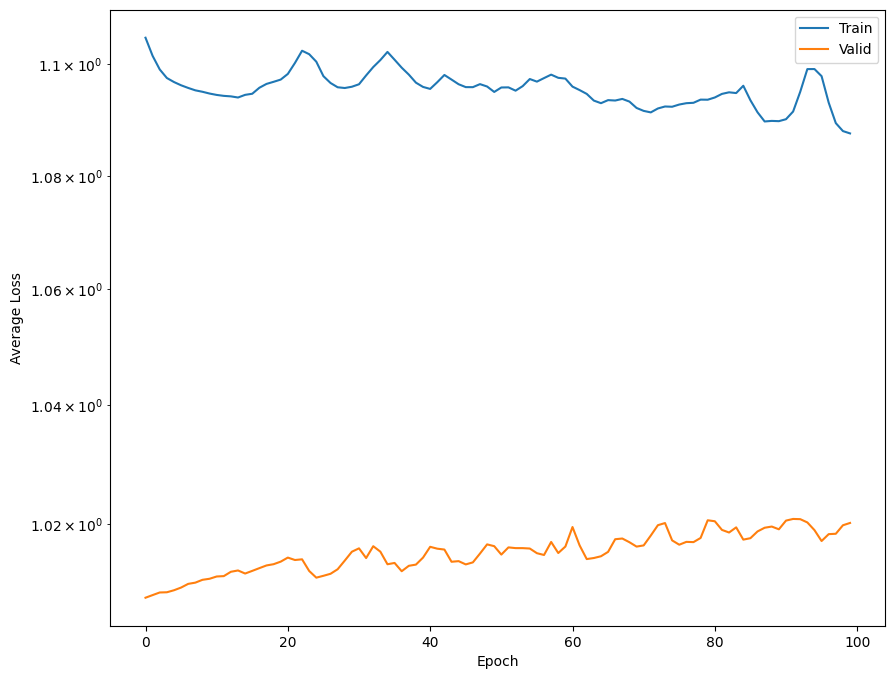

In [54]:
# Plot losses
plt.figure(figsize=(10,8))
plt.semilogy(diz_loss['train_loss'], label='Train')
plt.semilogy(diz_loss['val_loss'], label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
#plt.grid()
plt.legend()
#plt.title('loss')
plt.show()

### Bias

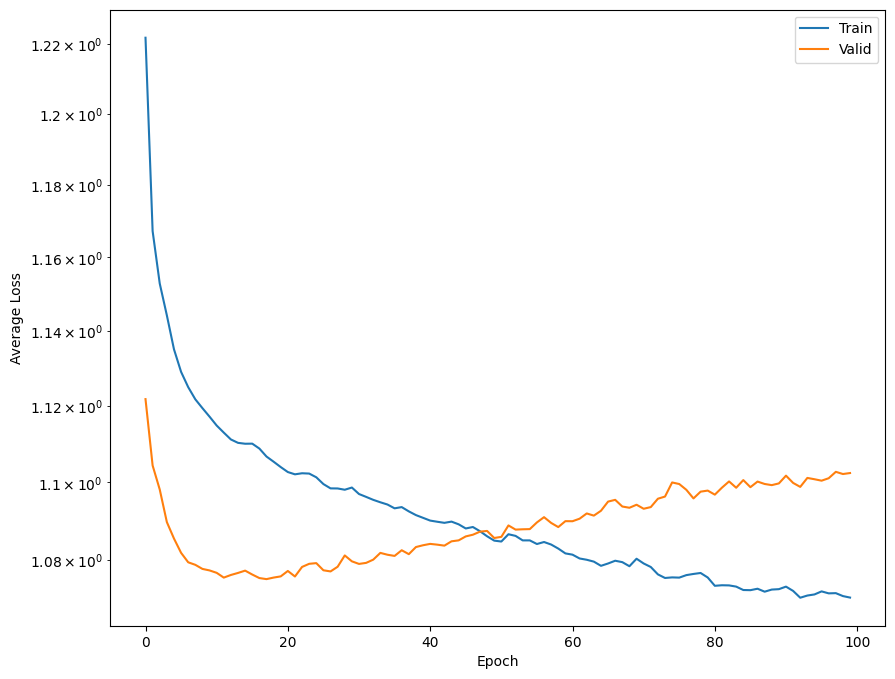

In [38]:
# Plot losses
plt.figure(figsize=(10,8))
plt.semilogy(diz_loss['train_loss'], label='Train')
plt.semilogy(diz_loss['val_loss'], label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
#plt.grid()
plt.legend()
#plt.title('loss')
plt.show()

In [46]:
for sample in tqdm(test_loader):
    print(sample[0].unsqueeze(0))
    print("------------------------")
    print(sample[0])

 40%|█████████████████                          | 17/43 [00:00<00:00, 84.94it/s]

tensor([[[16.,  5.,  0.,  4.,  2.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  5.,  0.,
           5.,  0.,  2.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
           0.,  4.,  0.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  1.,  0.,
           0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  2.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.],
         [ 5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,
           0.,  0.,  0.,  0.,  5.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
           0.,  0.,

 60%|██████████████████████████                 | 26/43 [00:00<00:00, 81.13it/s]

tensor([[[ 4.,  3.,  0.,  4.,  1.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,  7.,  0.,
           0.,  0.,  0.,  0.,  1.,  1.,  7.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
           0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
           0.,  1.],
         [ 3.,  3.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,

100%|███████████████████████████████████████████| 43/43 [00:00<00:00, 86.96it/s]

tensor([[[ 2.,  5., 10.,  1.,  2.,  1.,  3.,  0.,  3.,  3.,  1.,  0.,  1.,  2.,
           0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  1.,  1.,  1.,  8.,  1.,  3.,  0.,  0.,  1.,  0.,  0.,
           0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
           0.,  0.,  1.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
           1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,
           1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           1.,  0.],
         [ 4.,  5., 10.,  2.,  4.,  0.,  2.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,
           0.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
           1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
           0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,

In [51]:
encoded_samples = []
for sample in tqdm(train):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    encoder.eval()
    with torch.no_grad():
        encoded_img  = encoder(img)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = int(label)
    encoded_samples.append(encoded_sample)
encoded_samples = pd.DataFrame(encoded_samples)
encoded_samples

100%|█████████████████████████████████████| 2143/2143 [00:00<00:00, 4923.27it/s]


,Enc. Variable 0,Enc. Variable 1,Enc. Variable 2,Enc. Variable 3,label
0,0.540903,-1.187163,2.700639,2.471679,148494
1,-3.948184,2.801533,0.694706,-2.150291,316377
2,-3.163843,4.604188,-3.419179,2.418638,155987
3,6.764956,-2.899145,0.362853,2.634813,21569
4,-12.308022,-6.834624,1.888395,-7.981846,31260
...,...,...,...,...,...
2138,-4.655642,-0.996848,-3.105113,4.641680,282216
2139,8.709627,-5.019843,-1.294623,-4.159572,200750
2140,-3.110201,-1.421475,-6.547594,1.739766,224710
2141,2.943098,-1.885958,-3.095397,-0.966820,230345


In [59]:
df_embed= df_top100.merge(right=encoded_samples, left_on="Unnamed: 0", right_on="label", how="inner").iloc[:,-6:].copy()

In [60]:
df_embed

,Description,Enc. Variable 0,Enc. Variable 1,Enc. Variable 2,Enc. Variable 3,label
0,the animals on the farm are playing a game of ...,0.540903,-1.187163,2.700639,2.471679,148494
1,7 wonders the board game with more awards than...,-3.948184,2.801533,0.694706,-2.150291,316377
2,the abyss power is once again vacant so the ti...,-3.163843,4.604188,-3.419179,2.418638,155987
3,adigma is a party game which involves simultan...,6.764956,-2.899145,0.362853,2.634813,21569
4,description from boardgamenews in agricola you...,-12.308022,-6.834624,1.888395,-7.981846,31260
...,...,...,...,...,...,...
2138,hide your secret claim your destiny wolves of ...,-4.655642,-0.996848,-3.105113,4.641680,282216
2139,zombicide black plague ndash huntsman pack con...,8.709627,-5.019843,-1.294623,-4.159572,200750
2140,this sequel to the zombicide black plague will...,-3.110201,-1.421475,-6.547594,1.739766,224710
2141,description from the publisher a set of 4 kick...,2.943098,-1.885958,-3.095397,-0.966820,230345


## Notes

- SpaCy
- optuna
